<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/california_cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cities = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


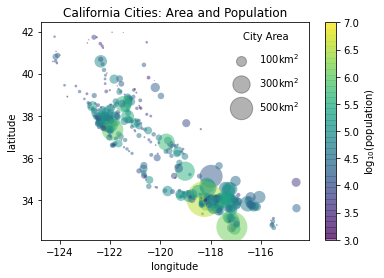

In [ ]:
# 興味のあるデータだけ抜粋
lat, lng = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# scatter plot
# c: color, s: size, cmap: colormap
plt.scatter(lng, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidths=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# legend
for area in [100, 300, 500]:
  plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + 'km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population')

In [ ]:
# basemapを使った可視化
# basemapのインストールに必要なライブラリを取得
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     \ 133.1 MB 3.5 MB/s
     |████████████████████████████████| 6.6 MB 5.2 MB/s 
     |████████████████████████████████| 219 kB 68.0 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759599 sha256=c88a732d1b985cd031de5d62bb6e92c39fcd2d0795ca0198e6883af80c2e5b65
  Stored in directory: /tmp/pip-ephem-wheel-cache-0

In [ ]:
from mpl_toolkits.basemap import Basemap

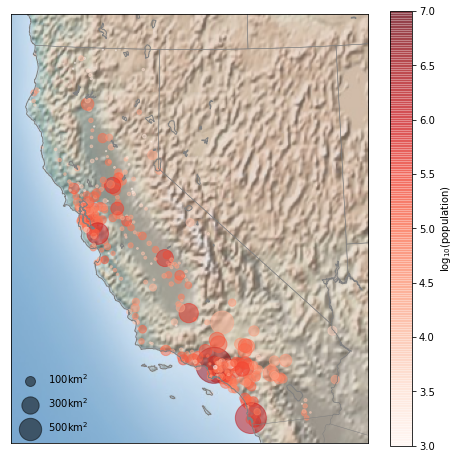

In [ ]:
lat_val = cities['latd'].values
lng_val = cities['longd'].values
pop_val = cities['population_total'].values
area_val = cities['area_total_km2'].values

# 1. draw the map background
fig = plt.figure(figsize=(8, 8))

# projectionは地図の投影法
# 円筒図法
# merc: メルカトル図法
# cea: 等積円筒図法
# 凝円筒図法
# moll: モルワイデ図法
# sinu: 正弦曲線図法
# robin: ロビンソン図法
# 投射図法
# ortho: 正射図法
# gnom: 心射方位図法
# stere: 平射投射
# 円錐図法
# lcc: 正角円錐図法
# eqdc: 正距円錐図法
# area: 正積円錐図法

# resolutionは粒度
# c: crude 粗い
# l: low 低
# i: intermediate 中間
# h: high 高
# f: full 最高
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
m.scatter(lng_val, lat_val, latlon=True, c=np.log10(pop_val), s=area_val, cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# 4. make legend with dummy points
for a in [100, 300, 500]:
  plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + 'km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')